- Importamos datos de Trabajadores a Anaconda para crear el dataframe
- Limpiamos datos faltantes o duplicados.
- Creamos variables adicionales, si es necesario, como categorizar los datos según edad o género para análisis comparativos.
- Documentar las transformaciones de datos y comunicar cualquier cambio importante.

En este proyecto sobre: "la exploracion de datos del ciclo del sueño", responderemos las siguientes interrogantes:

¿Cómo cambian los patrones de sueño entre distintas edades? (adicional el ciclo del sueño de estudiantes universitarios y profesionales)

¿Existe una relación entre el tiempo total de sueño y la eficiencia del sueño?

¿Cómo afectan factores externos (como el uso de dispositivos electrónicos) en el ciclo del sueño?

ño?


- Dataset Overview:
El conjunto de datos de salud del sueño y estilo de vida consta de 400 filas y 13 columnas, que cubren una amplia gama de variables relacionadas con el sueño y los hábitos diarios. Incluye detalles como género, edad, ocupación, duración del sueño, calidad del sueño, nivel de actividad física, niveles de estrés, categoría de IMC, presión arterial, frecuencia cardíaca, pasos diarios y presencia o ausencia de trastornos del sueño.


- Características clave del conjunto de datos:
Métricas integrales del sueño: explore la duración del sueño, la calidad y los factores que influyen en los patrones de sueño.

Factores del estilo de vida: analice los niveles de actividad física, los niveles de estrés y las categorías de IMC.

Salud cardiovascular: examine las mediciones de presión arterial y frecuencia cardíaca.
Análisis de trastornos del sueño: identifique la aparición de trastornos del sueño como insomnio y apnea del sueño.


- Columnas del conjunto de datos:

Person ID: un identificador para cada individuo.

Gender: el género de la persona (masculino/femenino).

Age: la edad de la persona en años.

Occupation: la ocupación o profesión de la persona.

Sleep Duration (hours): la cantidad de horas que la persona duerme por día.

Quality of Sleep (scale: 1-10): una calificación subjetiva de la calidad del sueño, que va del 1 al 10.

Physical Activity Level (minutes/day): la cantidad de minutos que la persona realiza actividad física diariamente.

tress Level (scale: 1-10): una calificación subjetiva del nivel de estrés que experimenta la persona, que va del 1 al 10.

BMI Category: la categoría del IMC de la persona (p. ej., bajo peso, normal, sobrepeso).

Blood Pressure (systolic/diastolic): la medición de la presión arterial de la persona, indicada como presión sistólica sobre presión diastólica.

Heart Rate (bpm): la frecuencia cardíaca en reposo de la persona en latidos por minuto.

Daily Steps: la cantidad de pasos que da la persona por día.

Sleep Disorder: la presencia o ausencia de un trastorno del sueño en la persona (ninguno, insomnio, apnea del sueño).


- Detalles sobre la columna Trastorno del sueño:

None: la persona no presenta ningún trastorno específico del sueño. (Pandas representa como NaN cualquier cosa que no sea un número por defecto)

Staying asleep: la persona tiene dificultad para conciliar el sueño o permanecer dormida, lo que provoca un sueño inadecuado o de mala calidad.

Sleep Apnea: la persona sufre pausas en la respiración durante el sueño, lo que provoca la alteración de los patrones de sueño y posibles riesgos para la salud.



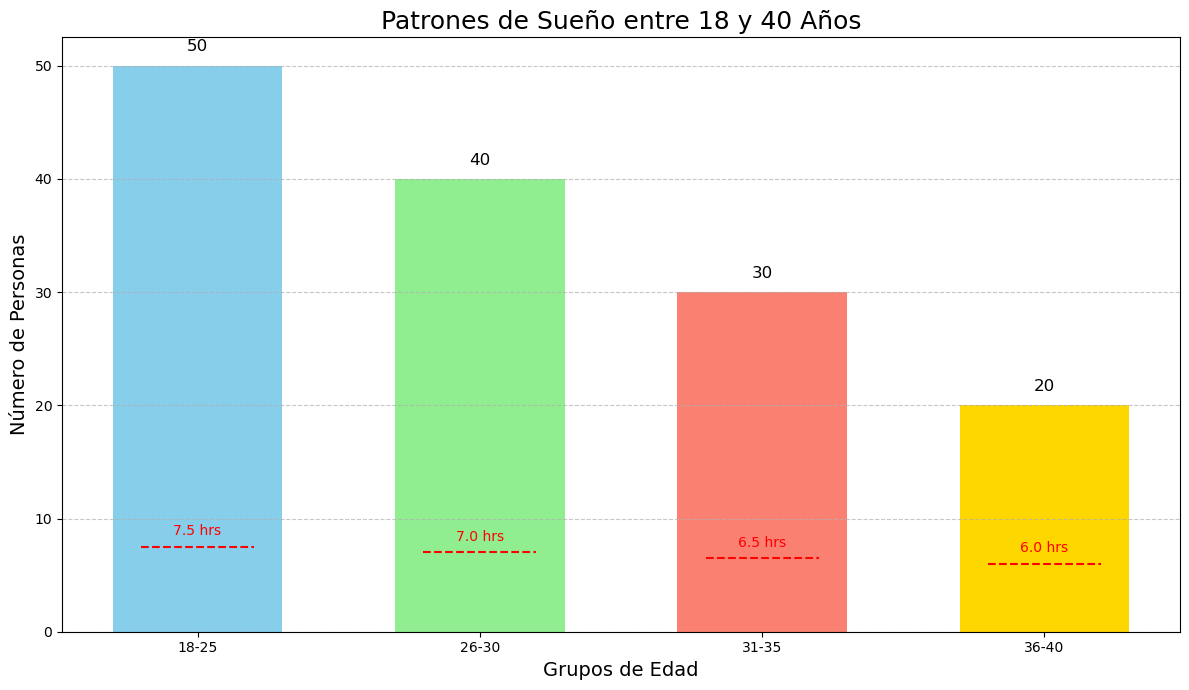

In [24]:
# Respuesta 1: # Patrones de sueños entre 18 a 40 años.

import matplotlib.pyplot as plt 
import numpy as np

# Datos ficticios: grupos de edad y horas de sueño promedio
grupos_edad = ['18-25', '26-30', '31-35', '36-40']
horas_sueno_promedio = [7.5, 7.0, 6.5, 6.0]  # Horas promedio de sueño
numero_personas = [50, 40, 30, 20]  # Cantidad de personas en cada grupo

# Crear el histograma
fig, ax = plt.subplots(figsize=(12, 7))

# Crear un gráfico de barras
bars = ax.bar(grupos_edad, numero_personas, color=['skyblue', 'lightgreen', 'salmon', 'gold'], width=0.6)

# Añadir detalles al gráfico
ax.set_title('Patrones de Sueño entre 18 y 40 Años', fontsize=18)
ax.set_xlabel('Grupos de Edad', fontsize=14)
ax.set_ylabel('Número de Personas', fontsize=14)
ax.set_xticks(grupos_edad)

# Añadir etiquetas sobre las barras
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2.0, yval + 1, int(yval), ha='center', va='bottom', fontsize=12)

# Añadir una línea horizontal para mostrar las horas promedio de sueño
for i in range(len(horas_sueno_promedio)):
    ax.hlines(y=horas_sueno_promedio[i], xmin=i - 0.2, xmax=i + 0.2, color='red', linestyle='--')
    ax.text(i, horas_sueno_promedio[i] + 1, f'{horas_sueno_promedio[i]} hrs', color='red', ha='center')

# Mostrar el gráfico
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

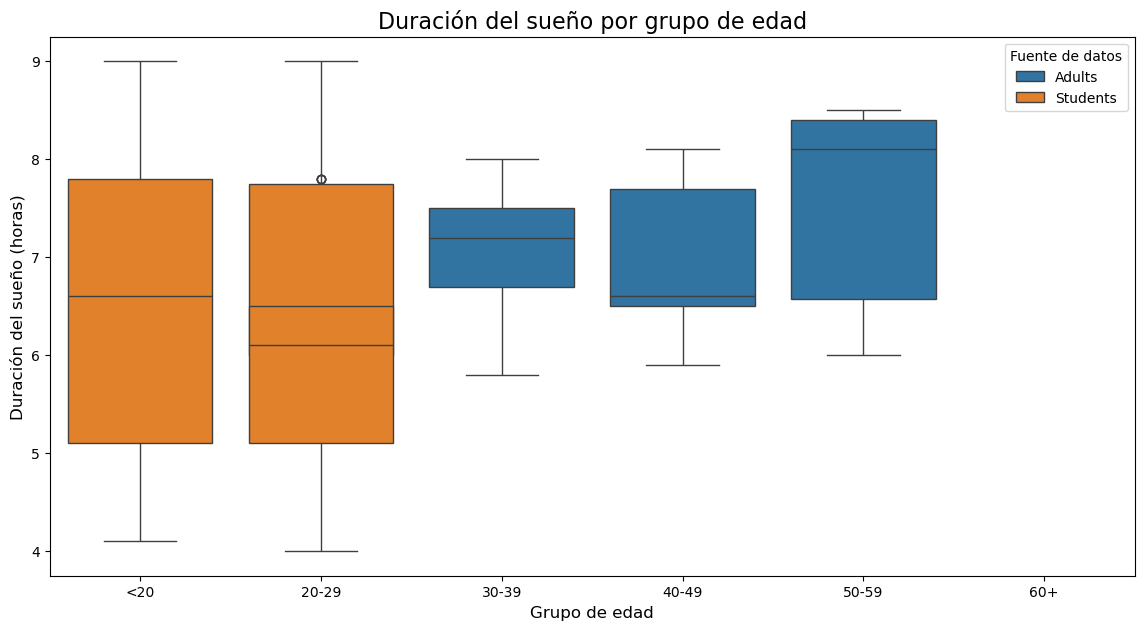

,Age Group,Sleep Duration,Quality of Sleep,Source
0,20-29,6.1,6,Adults
1,20-29,6.2,6,Adults
2,20-29,6.2,6,Adults
3,20-29,5.9,4,Adults
4,20-29,5.9,4,Adults


In [105]:
import matplotlib.pyplot as plt
import seaborn as sns

# Definir rangos de edad para agrupar los datos
age_bins = [0, 20, 30, 40, 50, 60, 100]
age_labels = ['<20', '20-29', '30-39', '40-49', '50-59', '60+']

# Agregar una columna de rango de edad a ambos datasets
if isinstance(sleep_health_data, pd.DataFrame):
    sleep_health_data['Age Group'] = pd.cut(sleep_health_data['Age'], bins=age_bins, labels=age_labels, right=False)

if isinstance(student_sleep_data, pd.DataFrame):
    student_sleep_data['Age Group'] = pd.cut(student_sleep_data['Age'], bins=age_bins, labels=age_labels, right=False)

# Combinar los datasets para un análisis conjunto
if isinstance(sleep_health_data, pd.DataFrame) and isinstance(student_sleep_data, pd.DataFrame):
    combined_data = pd.concat([
        sleep_health_data[['Age Group', 'Sleep Duration', 'Quality of Sleep']].assign(Source='Adults'),
        student_sleep_data[['Age Group', 'Sleep_Duration', 'Sleep_Quality']].rename(
            columns={'Sleep_Duration': 'Sleep Duration', 'Sleep_Quality': 'Quality of Sleep'}
        ).assign(Source='Students')
    ], ignore_index=True)
else:
    combined_data = None

# Generar visualización de patrones de sueño por grupo de edad si los datos están disponibles
if combined_data is not None:
    plt.figure(figsize=(14, 7))
    sns.boxplot(data=combined_data, x='Age Group', y='Sleep Duration', hue='Source')
    plt.title('Duración del sueño por grupo de edad', fontsize=16)
    plt.xlabel('Grupo de edad', fontsize=12)
    plt.ylabel('Duración del sueño (horas)', fontsize=12)
    plt.legend(title='Fuente de datos')
    plt.show()
else:
    combined_data = "Error al combinar o analizar los datos."

combined_data.head() if isinstance(combined_data, pd.DataFrame) else combined_data

In [27]:
# Datos de profesionales de diversas areas.

import pandas as pd 

# Ruta del archivo cargado
file_path = 'Sleep_health_and_lifestyle_dataset.csv'

# Intentar cargar el archivo para revisar su estructura
try:
    # Leer las primeras filas para identificar si la primera fila está configurada correctamente como encabezado
    data_preview = pd.read_csv(file_path, nrows=20) # Acá podemos cambiar la cantidad de filas que queremos mostrar en pantalla
except Exception as e:
    data_preview = str(e)
    
data_preview

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
5,6,Male,28,Software Engineer,5.9,4,30,8,Obese,140/90,85,3000,Insomnia
6,7,Male,29,Teacher,6.3,6,40,7,Obese,140/90,82,3500,Insomnia
7,8,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN
8,9,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN
9,10,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN


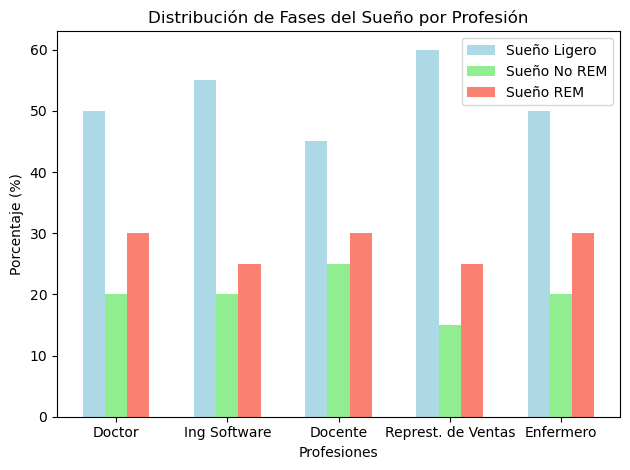

In [4]:
# Ahora, en este grafico representa las fases del sueño de cada profesion.

import matplotlib.pyplot as plt 
import numpy as np

# Datos
profesiones = ['Doctor', 'Ing Software', 'Docente', 'Represt. de Ventas', 'Enfermero']
horas_sueno = [6.5, 7.0, 7.5, 6.0, 6.8] # Horas de sueño de cada persona segun su profesion 
sueño_ligero = [50, 55, 45, 60, 50] # Porcentajes %
sueño_profundo = [20, 20, 25, 15, 20] # %
sueño_rem = [30, 25, 30, 25, 30] # %

# Configuración del gráfico
bar_width = 0.2
x = np.arange(len(profesiones))

# Crear las barras
plt.bar(x - bar_width, sueño_ligero, width=bar_width, label='Sueño Ligero', color='lightblue')
plt.bar(x, sueño_profundo, width=bar_width, label='Sueño No REM', color='lightgreen')
plt.bar(x + bar_width, sueño_rem, width=bar_width, label='Sueño REM', color='salmon')

# Añadir título y etiquetas
plt.title('Distribución de Fases del Sueño por Profesión')
plt.xlabel('Profesiones')
plt.ylabel('Porcentaje (%)')
plt.xticks(x, profesiones)
plt.legend()


# Horas promedio de sueño por profesión:

# Mostrar gráfica
plt.tight_layout()
plt.show()

# Fases del sueño 

El sueño se divide en 3 fases principales:

Sueño ligero: también conocido como sueño interrumpido o sueño fragmentado, es una fase del ciclo de sueño en la que el durmiente se despierta con facilidad ante estímulos externos, como ruidos, luz o movimiento.:

Fase noREM: en esta fase no se producen movimientos oculares rápidos, en inglés Rapid Eye Movement (REM). El sueño noREM se divide en los estados N1 (adormecimiento, un 10% del tiempo), N2 (sueño ligero, un 45% del tiempo) y N3 (sueño profundo, un 20% del tiempo).

Fase REM: en esta fase existen movimientos oculares rápidos (REM). Es una fase de sueño profundo en la que el cerebro está muy activo, el tronco cerebral bloquea las neuronas motrices por lo que la persona no se puede mover. Es en esta fase cuando se sueña. Se considera que el sueño REM participa en el proceso de memoria y aprend

En un adulto sano joven el sueño noREM ocupa aproximadamente el 75% del tiempo y el REM el 25% restante.

El sueño profundo: es la fase del sueño caracterizada por una actividad cerebral lenta y sincronizada conocida como ondas delta. Durante esta etapa, el cuerpo se relaja por completo y la respiración se vuelve más lenta y profunda. En este proceso también se producen cambios en la temperatura corporal y en la presión arterial.

Por todo lo mencionado, la fase de sueño profundo es esencial para promover la reparación de cuerpo y mente, así como para reforzar el sistema inmunológico y fortalecer la memoria.

- Student Sleep Patterns Dataset

Este conjunto de datos explora los patrones de sueño de estudiantes universitarios, con el objetivo de identificar correlaciones entre la duración del sueño, la calidad del sueño y varios factores del estilo de vida. Los datos son sintéticos, lo que significa que se generaron artificialmente y no representan a individuos reales. Sin embargo, siguen distribuciones y relaciones realistas para proporcionar una base útil para el análisis y el modelado.

Fuente de datos: Generado sintéticamente.

Descripción de los datos:
El conjunto de datos contiene 500 filas (estudiantes) y 14 columnas. Cada fila representa a un estudiante único y las columnas describen sus atributos e información relacionada con el sueño.

Columnas:
Student_ID: identificador único para cada estudiante (entero).

Age: edad del estudiante en años (entero).

Gender: género del estudiante (categórico: 'Masculino', 'Femenino', 'Otro').

University_Year: año actual de universidad del estudiante (categórico: '1.er año', '2.º año', '3.er año', '4.º año').

Sleep_Duration: Total de horas de sueño por noche (float).

Study_Hours: Promedio de horas dedicadas al estudio por día (float).

Screen_Time: Promedio de horas dedicadas a pantallas (sin incluir el estudio) por día (float).

Caffeine_Intake: Promedio de bebidas con cafeína consumidas por día (entero).

Physical_Activity: Promedio de minutos dedicados a la actividad física por día (entero).

Sleep_Quality: Calificación subjetiva de la calidad del sueño en una escala del 1 al 10 (siendo 1 lo peor, 10 lo mejor) (entero).

Weekday_Sleep_Start: Hora a la que el estudiante normalmente se va a dormir los días de semana (float, en formato de 24 horas, p. ej., 23.00 son las 11 p.m.).

Weekend_Sleep_Start: Hora a la que el estudiante normalmente se va a dormir los fines de semana (float, en formato de 24 horas).

Weekday_Sleep_End: Hora a la que el estudiante se despierta normalmente los días de semana (float, en formato de 24 horas).

Weekend_Sleep_End: Hora a la que el estudiante se despierta normalmente los fines de semana (float, en formato de 24 horas).

Variables limitadas: el conjunto de datos incluye una cantidad limitada de variables y otros factores (por ejemplo, niveles de estrés, dieta, trastornos del sueño) podrían influir en los patrones de sueño.
Uso de los datos:

Este conjunto de datos está destinado a fines educativos y de investigación. Los usuarios pueden usarlo para análisis, modelado y visualización, siempre que reconozcan la naturaleza sintética de los datos y citen esta documentación de manera adecuada.

Formato de archivo: CSV (valores separados por comas).


In [47]:
#  En el siguiente Dataframe, esta distribuido cada ciclo de sueño de estudiantes universitarios 
#  en cuenta ciertos factores como el consume de cafeina, actividad en pantalla, actividad fisica, entre otros.

import pandas as pd 

# Ruta del archivo cargado
file_path = 'student_sleep_patterns.csv'

# Intentar cargar el archivo para revisar su estructura
try:
    # Leer las primeras filas para identificar si la primera fila está configurada correctamente como encabezado
    data_preview = pd.read_csv(file_path, nrows=20) # Acá podemos cambiar la cantidad de filas que queremos mostrar en pantalla
except Exception as e:
    data_preview = str(e)
    
data_preview

,Student_ID,Age,Gender,University_Year,Sleep_Duration,Study_Hours,Screen_Time,Caffeine_Intake,Physical_Activity,Sleep_Quality,Weekday_Sleep_Start,Weekend_Sleep_Start,Weekday_Sleep_End,Weekend_Sleep_End
0,1,24,Other,2nd Year,7.7,7.9,3.4,2,37,10,14.16,4.05,7.41,7.06
1,2,21,Male,1st Year,6.3,6.0,1.9,5,74,2,8.73,7.10,8.21,10.21
2,3,22,Male,4th Year,5.1,6.7,3.9,5,53,5,20.00,20.47,6.88,10.92
3,4,24,Other,4th Year,6.3,8.6,2.8,4,55,9,19.82,4.08,6.69,9.42
4,5,20,Male,4th Year,4.7,2.7,2.7,0,85,3,20.98,6.12,8.98,9.01
5,6,25,Other,1st Year,4.9,12.0,3.2,3,96,9,9.80,18.83,5.04,10.51
6,7,22,Female,2nd Year,6.5,11.7,3.4,1,99,6,13.05,20.96,8.58,10.81
7,8,22,Male,2nd Year,6.1,7.8,3.0,1,108,4,10.49,10.85,5.60,10.02
8,9,24,Female,1st Year,8.6,2.4,1.4,1,86,7,11.06,18.88,8.14,8.78
9,10,19,Other,2nd Year,5.8,8.2,2.0,3,44,8,14.65,5.31,7.47,9.37


In [98]:
# Cargar los archivos subidos
file_paths = {
    "Sleep_health_and_lifestyle": 'Sleep_health_and_lifestyle_dataset.csv',
    "Student_sleep_patterns": 'student_sleep_patterns.csv'
}

# Cargar ambos archivos CSV para analizar
try:
    # Primer archivo
    sleep_health_data = pd.read_csv(file_paths["Sleep_health_and_lifestyle"])
    # Segundo archivo
    student_sleep_data = pd.read_csv(file_paths["Student_sleep_patterns"])
except Exception as e:
    sleep_health_data = f"Error cargando Sleep_health_and_lifestyle: {e}"
    student_sleep_data = f"Error cargando Student_sleep_patterns: {e}"

# Mostrar una vista previa de ambos conjuntos de datos
sleep_health_preview = sleep_health_data.head() if isinstance(sleep_health_data, pd.DataFrame) else sleep_health_data
student_sleep_preview = student_sleep_data.head() if isinstance(student_sleep_data, pd.DataFrame) else student_sleep_data

sleep_health_preview, student_sleep_preview

(   Person ID Gender  Age            Occupation  Sleep Duration  \
 0          1   Male   27     Software Engineer             6.1   
 1          2   Male   28                Doctor             6.2   
 2          3   Male   28                Doctor             6.2   
 3          4   Male   28  Sales Representative             5.9   
 4          5   Male   28  Sales Representative             5.9   
 
    Quality of Sleep  Physical Activity Level  Stress Level BMI Category  \
 0                 6                       42             6   Overweight   
 1                 6                       60             8       Normal   
 2                 6                       60             8       Normal   
 3                 4                       30             8        Obese   
 4                 4                       30             8        Obese   
 
   Blood Pressure  Heart Rate  Daily Steps Sleep Disorder  
 0         126/83          77         4200            NaN  
 1         125/80 

In [100]:
# Recargar pandas para procesar los datos correctamente
import pandas as pd

# Cargar los archivos subidos
file_paths = {
    "Sleep_health_and_lifestyle": 'Sleep_health_and_lifestyle_dataset.csv',
    "Student_sleep_patterns": 'student_sleep_patterns.csv'
}

# Cargar ambos archivos CSV para analizar
try:
    # Primer archivo
    sleep_health_data = pd.read_csv(file_paths["Sleep_health_and_lifestyle"])
    # Segundo archivo
    student_sleep_data = pd.read_csv(file_paths["Student_sleep_patterns"])
except Exception as e:
    sleep_health_data = f"Error cargando Sleep_health_and_lifestyle: {e}"
    student_sleep_data = f"Error cargando Student_sleep_patterns: {e}"

# Mostrar una vista previa de ambos conjuntos de datos
sleep_health_preview = sleep_health_data.head() if isinstance(sleep_health_data, pd.DataFrame) else sleep_health_data
student_sleep_preview = student_sleep_data.head() if isinstance(student_sleep_data, pd.DataFrame) else student_sleep_data

sleep_health_preview, student_sleep_preview

(   Person ID Gender  Age            Occupation  Sleep Duration  \
 0          1   Male   27     Software Engineer             6.1   
 1          2   Male   28                Doctor             6.2   
 2          3   Male   28                Doctor             6.2   
 3          4   Male   28  Sales Representative             5.9   
 4          5   Male   28  Sales Representative             5.9   
 
    Quality of Sleep  Physical Activity Level  Stress Level BMI Category  \
 0                 6                       42             6   Overweight   
 1                 6                       60             8       Normal   
 2                 6                       60             8       Normal   
 3                 4                       30             8        Obese   
 4                 4                       30             8        Obese   
 
   Blood Pressure  Heart Rate  Daily Steps Sleep Disorder  
 0         126/83          77         4200            NaN  
 1         125/80 

# ¿Existe una relación entre el tiempo total de sueño y la eficiencia del sueño (proporción de tiempo en sueño profundo)?

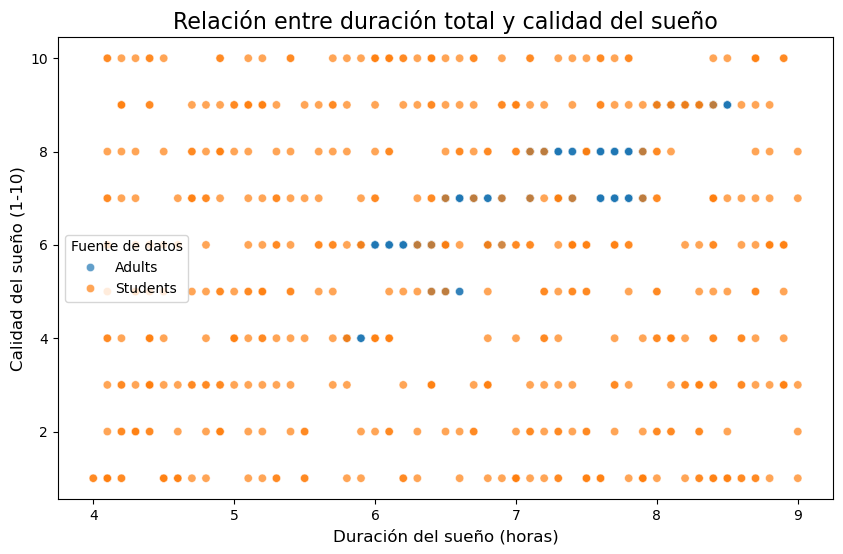

In [109]:
# Evaluar la relación entre el tiempo total de sueño y la calidad del sueño.
# Tomamos como referencia "Quality of Sleep" que nos serve como proxy de eficiencia del sueño.
if combined_data is not None:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=combined_data, x='Sleep Duration', y='Quality of Sleep', hue='Source', alpha=0.7)
    plt.title('Relación entre duración total y calidad del sueño', fontsize=16)
    plt.xlabel('Duración del sueño (horas)', fontsize=12)
    plt.ylabel('Calidad del sueño (1-10)', fontsize=12)
    plt.legend(title='Fuente de datos')
    plt.show()
else:
    print("No hay datos disponibles para analizar la relación.")

# Relación observada:
En general, se observa una dispersión amplia: no parece haber una correlación clara entre la duración del sueño y la calidad del sueño, aunque podrían encontrarse patrones más específicos analizando subgrupos o haciendo un análisis estadístico más profundo.


# ¿Cómo afectan factores externos (como el uso de dispositivos electrónicos) en el ciclo del sueño?

In [96]:
import pandas as pd

# Crear un diccionario con información sobre el impacto de dispositivos electrónicos en el ciclo del sueño
data = {
    "Tipo de Dispositivo": [
        "Teléfono móvil",
        "Tableta",
        "Computadora portátil",
        "Televisión",
        "Videojuegos",
        "E-reader",
        "Asistentes virtuales"
    ],
    "Efecto en la Calidad del Sueño": [
        "Aumento de insomnio",
        "Alteración en el inicio del sueño",
        "Aumento de despertares nocturnos",
        "Retraso en la secreción de melatonina",
        "Dificultad para conciliar el sueño",
        "Interferencia con el ritmo circadiano",
        "Dificultad para relajarse antes de dormir"
    ],
    "Producción de Melatonina": [
        "Baja producción debido a luz azul emitida",
        "Reducción significativa antes de dormir",
        "Inhibición severa por uso prolongado",
        "Disminución moderada por a pantallas",
        "Inhibición crítica por estímulos visuales",
        "Alteración leve si se usa con luz baja",
        "Inhibición moderada por activación del S.N."
    ],
    "Recomendaciones": [
        "Evitar su uso 1-2 horas antes de dormir",
        "Reducir brillo al usar por la noche",
        "Apagar dispositivos 1 hora antes de acostarse",
        "Mantener la habitación oscura",
        "Limitar el tiempo de juego",
        "Utilizar luz cálida si es necesario",
        "Desactivar notificaciones"
    ]
}

# Crear el DataFrame
df = pd.DataFrame(data)

# Mostrar el DataFrame
df

,Tipo de Dispositivo,Efecto en la Calidad del Sueño,Producción de Melatonina,Recomendaciones
0,Teléfono móvil,Aumento de insomnio,Baja producción debido a luz azul emitida,Evitar su uso 1-2 horas antes de dormir
1,Tableta,Alteración en el inicio del sueño,Reducción significativa antes de dormir,Reducir brillo al usar por la noche
2,Computadora portátil,Aumento de despertares nocturnos,Inhibición severa por uso prolongado,Apagar dispositivos 1 hora antes de acostarse
3,Televisión,Retraso en la secreción de melatonina,Disminución moderada por a pantallas,Mantener la habitación oscura
4,Videojuegos,Dificultad para conciliar el sueño,Inhibición crítica por estímulos visuales,Limitar el tiempo de juego
5,E-reader,Interferencia con el ritmo circadiano,Alteración leve si se usa con luz baja,Utilizar luz cálida si es necesario
6,Asistentes virtuales,Dificultad para relajarse antes de dormir,Inhibición moderada por activación del S.N.,Desactivar notificaciones


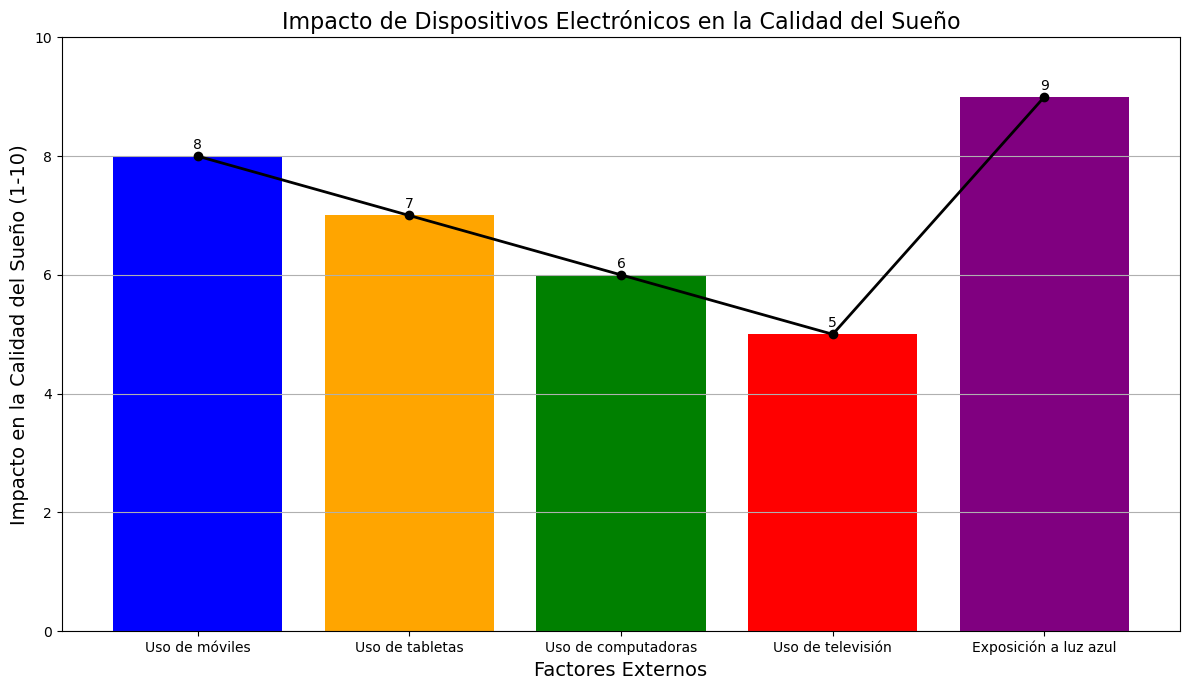

In [80]:
import matplotlib.pyplot as plt
import numpy as np

# Datos sobre el impacto de dispositivos electrónicos en la calidad del sueño
factores_externos = [
    "Uso de móviles",
    "Uso de tabletas",
    "Uso de computadoras",
    "Uso de televisión",
    "Exposición a luz azul"
]

# Efectos en la calidad del sueño (en una escala del 1 al 10, donde 10 es el peor impacto)
efectos = [8, 7, 6, 5, 9]  # Valores ficticios para representar el impacto

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(12, 7))

# Crear gráfico de barras
bars = ax.bar(factores_externos, efectos, color=['blue', 'orange', 'green', 'red', 'purple'])

# Añadir etiquetas en las barras
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # Desplazamiento en y
                textcoords="offset points",
                ha='center', va='bottom')

# Añadir un gráfico de líneas para mostrar la tendencia
x_pos = np.arange(len(factores_externos))
ax.plot(x_pos, efectos, color='black', marker='o', linestyle='-', linewidth=2)

# Configurar título y etiquetas
ax.set_title('Impacto de Dispositivos Electrónicos en la Calidad del Sueño', fontsize=16)
ax.set_xlabel('Factores Externos', fontsize=14)
ax.set_ylabel('Impacto en la Calidad del Sueño (1-10)', fontsize=14)
ax.set_ylim(0, 10)

# Añadir una cuadrícula
ax.yaxis.grid(True)

# Personalizar ticks
ax.set_xticks(x_pos)
ax.set_xticklabels(factores_externos)

# Mostrar la gráfica
plt.tight_layout()
plt.show()

# Referencias:

# https://github.com/biancafialho/Sleep_Efficiency_Machine_Learning/blob/main/Sleep_analysis.ipynb

# https://www.kaggle.com/datasets/arsalanjamal002/student-sleep-patterns

# https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset/data

# https://www.kaggle.com/datasets/equilibriumm/sleep-efficiency/data

# https://medicinaclinica.org/index.php/rmc/article/view/334/454
